In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv(r"C:\Users\suraj\Downloads\stud.csv")
data.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
data['Total_scores']=data['math_score']+data['reading_score']+data['writing_score']

In [9]:
data['Average_score']=round(data['Total_scores']/3,2)

In [10]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_scores,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [11]:
y=data['math_score']

In [12]:
data=data.drop(columns='math_score')

In [13]:
x=data

In [14]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,Total_scores,Average_score
0,female,group B,bachelor's degree,standard,none,72,74,218,72.67
1,female,group C,some college,standard,completed,90,88,247,82.33
2,female,group B,master's degree,standard,none,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.33
4,male,group C,some college,standard,none,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95,282,94.00
996,male,group C,high school,free/reduced,none,55,55,172,57.33
997,female,group C,high school,free/reduced,completed,71,65,195,65.00
998,female,group D,some college,standard,completed,78,77,223,74.33


In [15]:
cols=['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']

In [16]:
for col in cols:
     print(f"Unique values in {col}:", data[col].unique())

Unique values in gender: ['female' 'male']
Unique values in race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in lunch: ['standard' 'free/reduced']
Unique values in test_preparation_course: ['none' 'completed']


In [17]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

In [18]:
print(num_features),print(cat_features)

Index(['reading_score', 'writing_score', 'Total_scores', 'Average_score'], dtype='object')
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


(None, None)

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder

In [20]:
le=LabelEncoder()
for col in cat_features:
    x[col]=le.fit_transform(x[col])

In [21]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,Total_scores,Average_score
0,0,1,1,1,1,72,74,218,72.67
1,0,2,4,1,0,90,88,247,82.33
2,0,1,3,1,1,95,93,278,92.67
3,1,0,0,0,1,57,44,148,49.33
4,1,2,4,1,1,78,75,229,76.33


In [22]:
ss=StandardScaler()
for col in num_features:
    ss.fit(x[[col]])
    x[col]=ss.transform(x[[col]])

In [23]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=42,test_size=0.2)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [27]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.4566
- Mean Absolute Error: 3.5317
- R2 Score: 0.9184
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.5708
- Mean Absolute Error: 3.6013
- R2 Score: 0.9073


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.0901
- Mean Absolute Error: 0.8518
- R2 Score: 0.9951
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1908
- Mean Absolute Error: 0.9570
- R2 Score: 0.9937


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.1714
- Mean Absolute Error: 4.0380
- R2 Score: 0.8901
-----------------------

In [29]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,0.993710
5,Random Forest Regressor,0.923561
1,Lasso,0.907328
4,Decision Tree,0.856025
3,K-Neighbors Regressor,0.810225


In [30]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


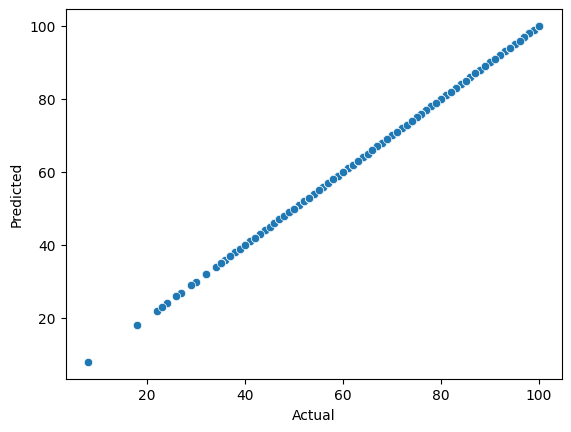

In [31]:
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [33]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
29,62,62.0,1.421085e-14
535,66,66.0,-1.421085e-14
695,79,79.0,1.421085e-14
557,61,61.0,7.105427e-15
836,73,73.0,1.421085e-14
...,...,...,...
106,87,87.0,1.421085e-14
270,69,69.0,0.000000e+00
860,53,53.0,-1.421085e-14
435,50,50.0,1.421085e-14
